In [10]:
using PyCall
using Plots

In [2]:
@pyimport tensorflow as tf

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data();

In [4]:
strain=size(x_train);
stest= size(x_test);

In [5]:
x_train_reshape = reshape(x_train[1:5000,:,:],(5000,strain[2],strain[3],1))
x_test_reshape = reshape(x_test[1:1000,:,:],(1000,stest[2],stest[3],1))
size(x_train_reshape),size(x_test_reshape)

((5000, 28, 28, 1), (1000, 28, 28, 1))

In [6]:
y_train_cat=tf.keras.utils.to_categorical(y_train[1:5000],length(unique(y_train[1:5000])))
y_test_cat =tf.keras.utils.to_categorical(y_test[1:1000],length(unique(y_test[1:1000])));

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(8,(3,3),activation="relu",strides=2,input_shape=(size(x_train_reshape)[2],
        size(x_train_reshape)[3],1)))
model.add(tf.keras.layers.Conv2D(16,(3,3),activation="relu"))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu"))
model.add(tf.keras.layers.GlobalMaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation("softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

2021-01-06 13:21:03.508604: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          4640      
_________________________________________________________________
global_max_pooling2d (Global (None, 32)                0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                330       
_________________________________________________________________
activation (Activation)      (None, 10)                0

In [9]:
history=model.fit(x_train_reshape,y_train_cat,epochs=10,batch_size=128,validation_data=(x_test_reshape,y_test_cat))

Epoch 1/10
40/40 [==============================] - 0s 11ms/step - loss: 9.9807 - accuracy: 0.1646 - val_loss: 3.5648 - val_accuracy: 0.2540
Epoch 2/10
40/40 [==============================] - 0s 8ms/step - loss: 2.7746 - accuracy: 0.3194 - val_loss: 2.4272 - val_accuracy: 0.3600
Epoch 3/10
40/40 [==============================] - 0s 7ms/step - loss: 1.9737 - accuracy: 0.4410 - val_loss: 1.9894 - val_accuracy: 0.4260
Epoch 4/10
40/40 [==============================] - 0s 7ms/step - loss: 1.5013 - accuracy: 0.5504 - val_loss: 1.6746 - val_accuracy: 0.5070
Epoch 5/10
40/40 [==============================] - 0s 7ms/step - loss: 1.1829 - accuracy: 0.6350 - val_loss: 1.4101 - val_accuracy: 0.5680
Epoch 6/10
40/40 [==============================] - 0s 8ms/step - loss: 0.9719 - accuracy: 0.6954 - val_loss: 1.2394 - val_accuracy: 0.6210
Epoch 7/10
40/40 [==============================] - 0s 7ms/step - loss: 0.8305 - accuracy: 0.7400 - val_loss: 1.1385 - val_accuracy: 0.6570
Epoch 8/10
40/40 [=

PyObject <tensorflow.python.keras.callbacks.History object at 0x0000000057DB1D90>

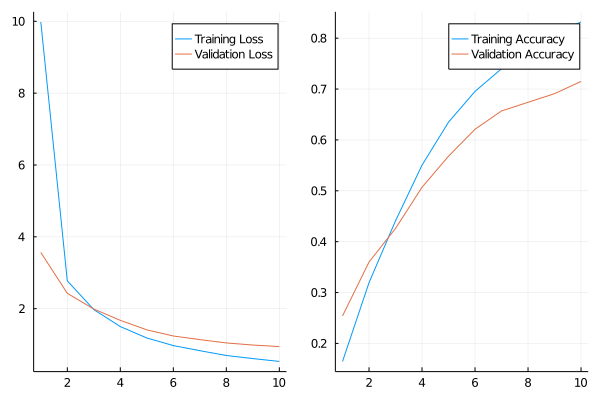

In [16]:
loss = hcat(history.history["loss"],history.history["val_loss"])
acc = hcat(history.history["accuracy"],history.history["val_accuracy"])
plot(plot(1:10,loss,labels=["Training Loss" "Validation Loss"]),plot(1:10,acc,labels=["Training Accuracy" "Validation Accuracy"]))